# Exercise sheet 5
**Hello everyone!**

**Points: 17 (2 bonus)**

Topics of this exercise sheet are:
* Working with probability distributions

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [ADAM](https://adam.unibas.ch/goto_adam_crs_1266890.html), [Piazza](https://piazza.com/class/kzy15kp8s5t6ku), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids22).

Please submit this exercise sheet on **ADAM**.
Naming conventions:

1. Create a folder with your unique identification (usually the first 6 letters of your last name and then 4 numbers). It should be same for all exercise sheet. If you changed, please use the one used to sheet 3.
2. Create a folder inside the previous folder, with name "exerciseX" where X is the sheet number.
3. Place the exercise sheet inside this folder. No dataset, no previous sheet, no remaining of this sheet.
4. Complete the sheet. Only put code or text inside the blocks where "# YOUR CODE HERE" or "YOUR ANSWER HERE" is written. Everything else will be deleted during grading. Don't add new blocks.
5. zip the folder with you name and submit it to the corresponding assignment. No renaming of the zip file either.

Common mistakes:
- Don't use capital letter for your identification name, or the exercise folder.
- Don't put previous sheet or dataset on the submission folders. Just the sheet, ipynb format.



**Handout date**: 2022/04/05 <br>
**Submission date**: 2022/04/12 <br>
**Discussion date**: 2022/04/17

## Introduction:
In this exercise, you get familiar with the basic concepts of probability and statistics. We recommend you to read this article to ensure you know the basic concepts well:
https://towardsdatascience.com/an-in-depth-crash-course-on-random-variables-a3905d03e322

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

# 1 (6 points)
## Binomial distribution:
The binomial distribution with parameters n and p is a class of the discrete probability distributions of <b> the number of successes in a sequence of $n$ independent experiments, </b> each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $1 − p$). The probability of happening $x$ times success in $n$ trials is:
$$
    p(x) = \binom{n}{x}p^x (1-p)^{n-x} 
$$

In [2]:
n = 20 # The total number of trials
p = 0.5 # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a (2 points)
Generate 10000 random samples from the given binomial distribution and plot the histogram.

Hint: Use X.rvs()

<AxesSubplot:ylabel='Count'>

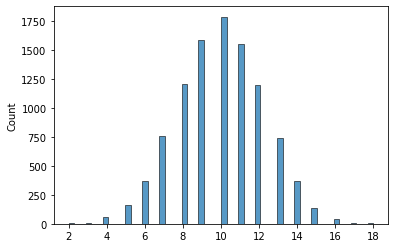

In [5]:
n_samples=10000
np.random.seed(0)
# YOUR CODE HERE
#raise NotImplementedError()
x = X.rvs(n_samples)
sns.histplot(x)

In [4]:
print(x.mean())
print(x.std())
assert_equal(len(x), n_samples)
assert_almost_equal(x.mean(), 9.968 , places=2)
assert_almost_equal(x.std() , 2.249 , places=2)

9.9682
2.249486332476817


### 1b (2 points)
What are $\text{P}(X = 8)$, $\text{P}(X = 10)$ and $\text{P}(X = 12)$?

Hint: Use X.pmf()

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
p8 = X.pmf(8)
p10 = X.pmf(10)
p12 = X.pmf(12)

In [8]:
print((p8 - p12)/p10)
print((p10*p12)+p8)

assert_almost_equal((p8 - p12)/p10, 0)
assert_almost_equal((p10*p12)+p8, 0.141 , places=2)

7.876288309103285e-17
0.14130167259281742


Which point has the highest probability? Why?

p10 because it is nearer to the mean of the distribution

### 1c (1 points bonus)
What are $\text{P}(X \leq 8)$, $\text{P}(X \leq 10)$, $\text{P}(X \leq 12)$ and $\text{P}(X \leq 20)$?

Hint: Use X.cdf()

In [14]:
# YOUR CODE HERE
#raise NotImplementedError()
p_le8 = X.cdf(8)
p_le10 = X.cdf(10)
p_le12 = X.cdf(12)
p_le20 = X.cdf(20)
print('P(X<=8)={:.4f}\nP(X<=10)={:.4f}\nP(X<=12)={:.4f}\nP(X<=20)={:.4f}'.format(p_le8, p_le10, p_le12,p_le20))


P(X<=8)=0.2517
P(X<=10)=0.5881
P(X<=12)=0.8684
P(X<=20)=1.0000


In [15]:
print(p_le10 - p_le8)
print((p_le12 - p_le20)/p_le8)

assert_almost_equal(p_le10 - p_le8, 0.336 , places=2)
assert_almost_equal((p_le12 - p_le20)/p_le8 , -0.522 , places=2)

0.3363761901855469
-0.5227505209319947


Do you see an increasing trend? Is $\text{P}(X \leq 20)$ the highest value and equals 1? Why? 

Because all the values are between 0 and 20, so all numbers are $\leq 20$ with probability 1

### 1d (2 points)
What are the mean, standard deviation and median of the generated samples?

Hint: You can use numpy!

In [17]:
# YOUR CODE HERE
#raise NotImplementedError()
mean = x.mean()
std = x.std()
median = np.median(x)
print((mean - std)/median)
print((mean ** std)+ median)

0.7718713667523183
186.34969576346643


In [18]:
assert_almost_equal((mean - std)/median, 0.771 , places=2)
assert_almost_equal((mean ** std)+ median, 186.349 , places=2)

Is the mean close to $n \times p$? Why should we expect this?

Yes it is close and it should be, as the probability times the number gives the expected value, and this value is approximated by the mean.

# 2 (6 points)
## Multimodal distributions:
Now we consider samples from two binomial distributions with different p values.

In [20]:
n = 20
p1 = 0.2
p2 = 0.8
X1 = stats.binom(n, p1)
X2 = stats.binom(n, p2)

### 2a (2 points)

Generate 5000 random samples from each of these two binomial distributions and concatenate the samples to make a unified vector. Plot the histogram of the concatenated samples.

In [26]:
n_samples=5000
np.random.seed(0)

# YOUR CODE HERE
#raise NotImplementedError()
x1 = X1.rvs(n_samples)
x2 = X2.rvs(n_samples)
x = np.concatenate((x1, x2))

In [27]:
print((x1.mean() + x2.mean())/x.mean())
print((x1.mean() - x2.mean())*x.mean())

assert_almost_equal((x1.mean() + x2.mean())/x.mean(), 2.000 , places=2)
assert_almost_equal((x1.mean() - x2.mean())*x.mean(), -120.670 , places=2)

2.0000000000000004
-120.67095896


### 2b (4 points)

Calculate the mean, median and the first two modes of the concatenated samples.

Hint: You can use np.unique and np.argsort to find the first and the second modes

In [55]:
# YOUR CODE HERE
#raise NotImplementedError()
mean = x.mean()
median = np.median(x)

mode1 = np.argsort(np.unique(x, return_counts=True)[1])[-1]
mode2 = np.argsort(np.unique(x, return_counts=True)[1])[-2]

print('Mean: {:.2f} \nMedian: {:.2f} \nFirst mode: {:.2f}\nSecond mode: {:.2f}'.format(mean, median, mode1, mode2))

Mean: 10.01 
Median: 10.00 
First mode: 16.00
Second mode: 4.00


In [58]:
print((mean - median)/mode1)
print((mode1 - mode2)/ mean)

assert_almost_equal((mean - median)/mode1, 0.000 , places=2)
assert_almost_equal((mode1 - mode2)/ mean, 1.198 , places=2)

0.0006374999999999575
1.1987772472078482


Which of these is a better represetation of this type of data? Why?

The first and second mode are a better representation because we can get that the distribution is multimodal, while the mean and median don't show that

# 3 (3 points)

## Normal distribution:
Normal (Gaussian) distribution is a class of continuous probability distributions with mean $\mu$ and standard deviation $\sigma$:
$$
    p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

In [59]:
mu = 3.0
sigma = 2.0
X = stats.norm(loc = mu , scale = sigma)
 
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 3a (1 points)

Generate 10000 random samples from the the given normal distribution and plot the histogram.

<AxesSubplot:ylabel='Count'>

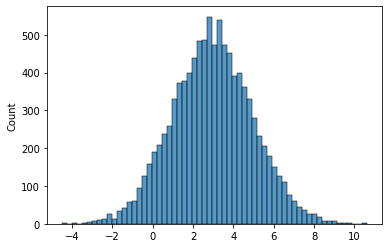

In [76]:
n_samples=10000
np.random.seed(0)

# YOUR CODE HERE
#
# raise NotImplementedError()
x = X.rvs(n_samples)
sns.histplot(x)

In [61]:
print(x.mean())
print(x.std())

assert_equal(len(x), n_samples)
assert_almost_equal(x.mean(), 2.963 , places=2)
assert_almost_equal(x.std() , 1.975 , places=2)

2.963132559683469
1.9751131363522416


### 3b (1 points)

What are $\text{P}(X = 2)$, $\text{P}(X = 3)$ and $\text{P}(X = 4)$?

In [96]:
# YOUR CODE HERE
#raise NotImplementedError()
cdf_upper_limit = X.cdf(2)
cdf_lower_limit = X.cdf(2)
 
p2 = cdf_upper_limit - cdf_lower_limit
cdf_upper_limit = X.cdf(3)
cdf_lower_limit = X.cdf(3)
p3 = cdf_upper_limit - cdf_lower_limit
cdf_upper_limit = X.cdf(4)
cdf_lower_limit = X.cdf(4)
p4 = cdf_upper_limit - cdf_lower_limit
#Because the normal distribution is continous, the Probability at a single defined point is 0

print('P(X=2)={:.4f}|P(X=3)={:.4f}|P(X=4)={:.4f}'.format(p2, p3, p4))

P(X=2)=0.0000|P(X=3)=0.0000|P(X=4)=0.0000


In [97]:
assert_equal((p2 - p3), 0)
assert_equal((p2*p3)+p4, 0)

### 3c (1 points bonus)

What are $\text{P}(X \leq 2)$, $\text{P}(2 < X \leq 3)$ and $\text{P}(X \geq 4)$?

In [89]:
# YOUR CODE HERE
#raise NotImplementedError()
p_le2 = X.cdf(2) 
p_g2_le3 = X.cdf(3) - p_le2
p_ge4 = X.sf(4)

print('P(X<=2)={:.4f}\nP(2<X<=3)={:.4f}\nP(X>=4)={:.4f}'.format(p_le2, p_g2_le3, p_ge4))

P(X<=2)=0.3085
P(2<X<=3)=0.1915
P(X>=4)=0.3085


In [90]:
print(p_le2 - p_ge4)
print((p_g2_le3 - p_le2)/p_ge4)

assert_equal(p_le2 - p_ge4, 0)
assert_almost_equal((p_g2_le3 - p_le2)/p_ge4 , -0.379 , places=2)

0.0
-0.37945164771651496


Are $\text{P}(X \leq 2)$ and $\text{P}(X \geq 4)$ equal? Why?

Because the mean is 3 and 4 and 2 are just as far appart from it, so because it is a normal distribution the probability is the same due to symmetry

### 3d (1 points)

What are the mean, standard deviation, and median of the generated samples?

In [91]:
# YOUR CODE HERE
#raise NotImplementedError()
mean = x.mean()
std = x.std()
median = np.median(x)
print('Mean={:.4f}|Std={:.4f}|Median={:.4f}'.format(mean, std, median))

Mean=2.9631|Std=1.9751|Median=2.9459


In [92]:
print((mean - std)/median)
print((mean ** std)+ median)

assert_almost_equal((mean - std)/median, 0.335 , places=2)
assert_almost_equal((mean ** std)+ median, 11.491 , places=2)

0.3353931166664757
11.491832527031372


Are the mean and std close to the $\mu$ and $\sigma$? How about the median? Why?

Yes it is close to the mu and sigma, as the more samples are taken, the closer the mean and std are to mu and sigma